In [1]:
import pyautogui

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
number_one = np.load('./numbers/number_one.npy')
number_two = np.load('./numbers/number_two.npy')
number_three = np.load('./numbers/number_three.npy')
number_four = np.load('./numbers/number_four.npy')
number_five = np.load('./numbers/number_five.npy')
number_six = np.load('./numbers/number_six.npy')
number_seven = np.load('./numbers/number_seven.npy')
number_eight = np.load('./numbers/number_eight.npy')
number_nine = np.load('./numbers/number_nine.npy')

In [4]:
print(number_one.shape)
print(number_two.shape)
print(number_three.shape)
print(number_four.shape)
print(number_five.shape)
print(number_six.shape)
print(number_seven.shape)
print(number_eight.shape)
print(number_nine.shape)

(54, 31, 3)
(54, 31, 3)
(54, 31, 3)
(54, 31, 3)
(54, 31, 3)
(54, 31, 3)
(54, 31, 3)
(54, 31, 3)
(54, 31, 3)


In [6]:
image_1_extension = np.expand_dims(number_one,axis=0)
image_2_extension = np.expand_dims(number_two,axis=0)
image_3_extension = np.expand_dims(number_three,axis=0)
image_4_extension = np.expand_dims(number_four,axis=0)
image_5_extension = np.expand_dims(number_five,axis=0)
image_6_extension = np.expand_dims(number_six,axis=0)
image_7_extension = np.expand_dims(number_seven,axis=0)
image_8_extension = np.expand_dims(number_eight,axis=0)
image_9_extension = np.expand_dims(number_nine,axis=0)

In [7]:
image_array = np.concatenate((image_1_extension,image_2_extension),axis=0)
image_array = np.concatenate((image_array,image_3_extension),axis=0)
image_array = np.concatenate((image_array,image_4_extension),axis=0)
image_array = np.concatenate((image_array,image_5_extension),axis=0)
image_array = np.concatenate((image_array,image_6_extension),axis=0)
image_array = np.concatenate((image_array,image_7_extension),axis=0)
image_array = np.concatenate((image_array,image_8_extension),axis=0)
image_array = np.concatenate((image_array,image_9_extension),axis=0)

In [8]:
image_array = tf.image.resize(image_array,(54,31))

In [9]:
image_array.shape

TensorShape([9, 54, 31, 3])

In [10]:
num_classes = 9
batch_size = 1

In [11]:
label = [i for i in range(0,9)]
label = tf.one_hot(label,num_classes)

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((image_array,label))
train_dataset = train_dataset.shuffle(len(list(train_dataset))) # over or equal than dataset number
print(len(list(train_dataset)))
train_dataset = train_dataset.batch(batch_size)

print(train_dataset)

9
<BatchDataset shapes: ((None, 54, 31, 3), (None, 9)), types: (tf.float32, tf.float32)>


In [13]:
class Conv(tf.keras.Model):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        ## 코드 시작 ##
        self.conv = tf.keras.layers.Conv2D(filters=num_filters,kernel_size=[kernel_size, kernel_size],padding='Same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        self.dropout = tf.keras.layers.Dropout(0.25)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv(inputs)    # self.conv forward
        x = self.bn(x)    # self.bn   forward
        x = self.relu(x)    # self.relu forward
        x = self.pool(x)    # self.pool forward
        x = self.dropout(x)
        ## 코드 종료 ##

        return x

In [14]:
class SimpleCNN(tf.keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ## 코드 시작 ##
        self.conv1 = Conv(32,5)
        self.conv2 = Conv(64,3)

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=256,activation=tf.nn.relu)
        self.dropout = tf.keras.layers.Dropout(0.25)
        self.dense2 = tf.keras.layers.Dense(units=num_classes,activation=tf.nn.softmax)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv1(inputs)    # self.conv1 forward
        x = self.conv2(x)    # self.conv2 forward
        x = self.flatten(x)    # flatten 
        x = self.dense1(x)    # self.dense1 forward
        x = self.dropout(x)
        x = self.dense2(x)    # self.dense2 forward
        ## 코드 종료 ##

        return x

In [15]:
model = SimpleCNN()
for images, labels in train_dataset.take(1):
    print(images.shape)
    outputs = model(images, training=False)
model.summary()

(1, 54, 31, 3)
Model: "simple_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv)                  multiple                  2560      
_________________________________________________________________
conv_1 (Conv)                multiple                  18752     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1491200   
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  2313      
Total params: 1,514,825
Trainable params: 1,514,633
Non-trainable params: 192
_____________________________

In [16]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss="categorical_crossentropy")

In [17]:
outputs = model.fit(train_dataset,epochs=145,verbose=1)

Train for 9 steps
Epoch 1/145
9/9 [==============================] - 1s 75ms/step - loss: 18.6524
Epoch 2/145
9/9 [==============================] - 0s 5ms/step - loss: 10.5028
Epoch 3/145
9/9 [==============================] - 0s 5ms/step - loss: 5.8992
Epoch 4/145
9/9 [==============================] - 0s 5ms/step - loss: 3.0621
Epoch 5/145
9/9 [==============================] - 0s 5ms/step - loss: 2.1244
Epoch 6/145
9/9 [==============================] - 0s 5ms/step - loss: 1.0216
Epoch 7/145
9/9 [==============================] - 0s 5ms/step - loss: 0.3605
Epoch 8/145
9/9 [==============================] - 0s 5ms/step - loss: 0.2772
Epoch 9/145
9/9 [==============================] - 0s 5ms/step - loss: 0.4046
Epoch 10/145
9/9 [==============================] - 0s 5ms/step - loss: 0.0304
Epoch 11/145
9/9 [==============================] - 0s 5ms/step - loss: 1.8231
Epoch 12/145
9/9 [==============================] - 0s 5ms/step - loss: 0.1144
Epoch 13/145
9/9 [======================

Epoch 100/145
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 101/145
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 102/145
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 103/145
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 104/145
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 105/145
9/9 [==============================] - 0s 6ms/step - loss: 2.5166e-07
Epoch 106/145
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 107/145
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 108/145
9/9 [==============================] - 0s 5ms/step - loss: 6.7552e-07
Epoch 109/145
9/9 [==============================] - 0s 5ms/step - loss: 2.3842e-07
Epoch 110/145
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 111/145
9/9 [==============================] - 0s 5ms/step - loss: 1.8

In [23]:
model.save_weights(os.path.join('./trained_model/my_model_bcimoneydigit'))

In [18]:
result1 = model(image_array[0:5])

In [19]:
print(np.argmax(result1,axis=1)+1)

[1 2 3 4 5]


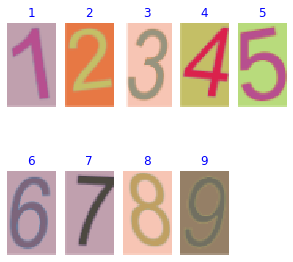

In [20]:
labels_map = {1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}

predict = model(image_array, training=False)
real_label = [i for i in range(1,10)]

fig = plt.figure(figsize=(5, 5))
for i, (pre, label, image) in enumerate(zip(predict, real_label, image_array)):
    p = fig.add_subplot(2, 5, i+1)
    if np.argmax(pre)+1 == label:
        p.set_title("{}".format(labels_map[label]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(pre)+1],
                                   labels_map[label]), color='red')
    p.imshow(image)
    p.axis('off')


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[1.0000000e+00 6.1135103e-15 1.8190143e-12 1.4345557e-11 1.3892640e-10
  4.7152085e-14 3.0130607e-12 6.8093128e-11 1.2060963e-12]
 [9.0501532e-30 1.3092176e-27 1.4027485e-35 1.0000000e+00 3.4485966e-32
  5.3367982e-29 3.2573452e-29 6.2391447e-26 4.9382880e-31]
 [1.0000000e+00 2.8955252e-17 1.2264982e-14 1.3131953e-14 1.6531511e-12
  1.8620852e-14 1.4731128e-13 1.1506780e-13 1.0045771e-14]], shape=(3, 9), dtype=float32)
[1 4 1]


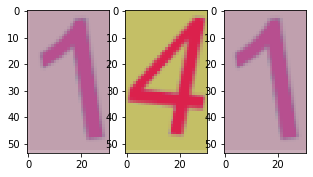

In [22]:
im = pyautogui.screenshot(region=(1000,278, 105, 54))

all_number = np.array(im)

first_number = all_number[:,0:31]/255.
second_number = all_number[:,37:68]/255.
third_number = all_number[:,71:102]/255.

fig = plt.figure(figsize=(5, 5))
p = fig.add_subplot(1, 3, 1)
p.imshow(first_number)
p = fig.add_subplot(1, 3, 2)
p.imshow(second_number)
p = fig.add_subplot(1, 3, 3)
p.imshow(third_number)

first_number_extension = np.expand_dims(first_number,axis=0)
second_number_extension = np.expand_dims(second_number,axis=0)
third_number_extension = np.expand_dims(third_number,axis=0)

number_array = np.concatenate((first_number_extension,second_number_extension),axis=0)
number_array = np.concatenate((number_array,third_number_extension),axis=0)

result = model(number_array[0:3])

print(result)

print(np.argmax(result,axis=1)+1)